In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sps

In [118]:
df_data = pd.read_csv("../Data/preprocessed_full_data.csv")
df_data = df_data.drop("Unnamed: 0", axis=1)
# display(df_data)

In [119]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

#### Use first ID to check possibilities in finding peaks and distances

In [120]:
sd_norm = string_to_ndarray(df_data["SegmentData"][6])
sd_bril = string_to_ndarray(df_data["SegmentData"][366])

In [121]:
n_peaks, n_dict = sps.find_peaks(sd_norm[:,1], height=(None,0))
n_xs = [sd_norm[:,2][peak] for peak in n_peaks]
n_ys = list(n_dict.values())[0]

b_peaks, b_dict = sps.find_peaks(sd_bril[:,1], height=(None,0))
b_xs = [sd_bril[:,2][peak] for peak in b_peaks]
b_ys = list(b_dict.values())[0]

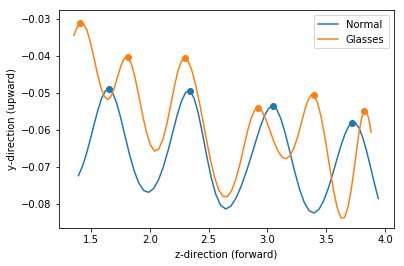

In [122]:
plt.plot(sd_norm[:,2], sd_norm[:,1], label="Normal")
plt.plot(sd_bril[:,2], sd_bril[:,1], label="Glasses")
plt.scatter(n_xs, n_ys)
plt.scatter(b_xs, b_ys)
plt.xlabel("z-direction (forward)")
plt.ylabel("y-direction (upward)")
plt.legend()
plt.show()

In [126]:
n_dis = np.mean(np.diff(n_xs))
b_dis = np.mean(np.diff(b_xs))
print(n_dis, b_dis)

0.6890988033333333 0.48253635799999994
